In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
plt.rcParams['figure.dpi'] = 150


In [12]:
from os.path import isfile, isdir, basename, splitext
from os import makedirs
import xml.etree.ElementTree as ET

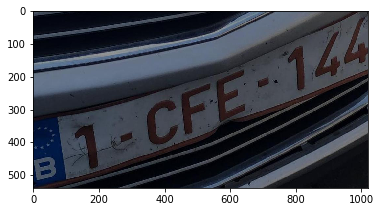

In [9]:
img_ndarray = cv2.imread('/media/jones/datarec/lpr/fontes/ocr/theophilebuy/data/Images/003Character/m501_0.jpg')
img_ndarray = cv2.cvtColor(img_ndarray, cv2.COLOR_BGR2RGB)
imshow(img_ndarray)

1
126
C
346
F
450
E
557
1
774
4
857
4
946


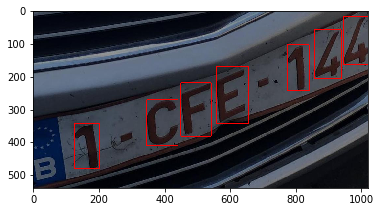

In [27]:
arquivo_gt = '/media/jones/datarec/lpr/fontes/ocr/theophilebuy/data/AnnotationsXML/003Character/m501_0.xml'
annotation_tree = ET.parse(arquivo_gt)
tag_raiz = annotation_tree.getroot()
for indice_tag_image, image_tag in enumerate(tag_raiz.findall('object')):
    nome_caracter = image_tag.find('name')
    print(nome_caracter.text)
    bbox = image_tag.find('bndbox')
    top_left_x = int(bbox.find('xmin').text)
    top_left_y = int(bbox.find('ymin').text)
    bottom_right_x = int(bbox.find('xmax').text)
    bottom_right_y = int(bbox.find('ymax').text)
    print(top_left_x)
    tl_abs = top_left_x,top_left_y
    br_abs = bottom_right_x,bottom_right_y
    color = (255, 0, 0)    
    thickness = 2
    img_ndarray = cv2.rectangle(img_ndarray,tl_abs,br_abs,color,thickness=thickness)
imshow(img_ndarray)
    


In [ ]:
color = (255, 0, 0)    
thickness = 2
image_ndarray = cv2.rectangle(image_ndarray,tl_abs,br_abs,color,thickness=thickness)
imshow(image_ndarray)

In [4]:
arquivo_gt = '/media/jones/datarec/lpr/fontes/ocr/theophilebuy/data/AnnotationsXML/003Character/m501_0.xml'
annotation_tree = ET.parse(arquivo_gt)
f = open('/media/jones/dataset/alpr/lotes_rotulacao/preprocessados/train_carro_teste/fr_l6_086_0704_1015_1626_0000_0130_2m000001315.txt','r')
bbox_pts_list = f.readlines()
f.close()
print(bbox_pts_list[0])

FileNotFoundError: [Errno 2] No such file or directory: '/media/jones/dataset/alpr/lotes_rotulacao/preprocessados/train_carro_teste/fr_l6_086_0704_1015_1626_0000_0130_2m000001315.txt'

In [5]:
h,w = img_ndarray.shape[0:2]
print('w: %s | h : %s ' % (w, h))

AttributeError: 'NoneType' object has no attribute 'shape'

In [6]:
array_pts_list = []
for bbox_pts in bbox_pts_list:
    if bbox_pts and len(bbox_pts)>2:
        bbox_pts = bbox_pts.replace('\n','')
        pontos = bbox_pts.split(',')[1:9]
        print(pontos)
        pontos = [int(float(ponto)*w) if indice < 4 else int(float(ponto)*h)  for indice, ponto in enumerate(pontos)]
        print(pontos)
        array_pts = [[pontos[i],pontos[4+i]] for i in range(4)]
        print(array_pts)
        array_pts_list.append(array_pts)

NameError: name 'bbox_pts_list' is not defined

In [7]:
for array_pts in array_pts_list:
    pts = np.array(array_pts).reshape((-1, 1, 2))
    color = (255, 0, 0)
    # Line thickness of 2 px
    thickness = 2
    # Using cv2.polylines() method
    # Draw a Blue polygon with 
    # thickness of 1 px
    isClosed = True
    image = cv2.polylines(img_ndarray, [pts], isClosed, color, thickness)
imshow(image)

NameError: name 'image' is not defined

In [22]:
def imprimir_imagem(caminho_amostra):
    arquivo_imagem = caminho_amostra+'.jpg'
    arquivo_gt = caminho_amostra+'.txt'
    img_ndarray = cv2.imread(arquivo_imagem)
    img_ndarray = cv2.cvtColor(img_ndarray, cv2.COLOR_BGR2RGB)
    h,w = img_ndarray.shape[0:2]
    f_gt = open(arquivo_gt,'r')
    bbox_pts_list = f_gt.readlines()
    f_gt.close()
    array_pts_list = []
    for bbox_pts in bbox_pts_list:
        if bbox_pts and len(bbox_pts)>2:
            bbox_pts = bbox_pts.replace('\n','')
            pontos = bbox_pts.split(',')[1:9]
#             print(pontos)
            pontos = [int(float(ponto)*w) if indice < 4 else int(float(ponto)*h)  for indice, ponto in enumerate(pontos)]
#             print(pontos)
            array_pts = [[pontos[i],pontos[4+i]] for i in range(4)]
#             print(array_pts)
            array_pts_list.append(array_pts)
    for array_pts in array_pts_list:
        pts = np.array(array_pts).reshape((-1, 1, 2))
        color = (255, 0, 0)    
        thickness = 2    
        isClosed = True
        img_ndarray = cv2.polylines(img_ndarray, [pts], isClosed, color, thickness)
    imshow(img_ndarray)
    

In [9]:
imagens = ['/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l4_175_3104_1_1_000000366_000001',
'/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l3_202_3104_1000_1215_4000020974_000000',
'/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/fr_l5_006_2804_1430_1825_0015_0115000001310_000007',
'/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l4_175_3104_1_1_000000687_000004',
'/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l4_175_3104_1_1_000000406_000001',
'/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l4_255_3104_1_1_000000219_000004',
'/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l4_175_3104_1_1_000000545_000000',
'/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l4_175_3104_1_1_000000681_000000']

In [10]:
imprimir_imagem('/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/validation_carro/l4_175_3104_1_1_000000545_000000')    

error: /home/jones/opencv-3.4.0/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [11]:
caminho_imagem_sampleada = '/media/jones/dataset/alpr/fontes/lpr/wpod/alpr-unconstrained/samples/034_1304_1354_1705_0000_0130m000000041_transf'
imprimir_imagem(caminho_imagem_sampleada)

error: /home/jones/opencv-3.4.0/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [12]:
imprimir_imagem('/media/jones/dataset/alpr/lotes_rotulacao/preprocessados/train_carro_teste/fr_l6_086_0704_1015_1626_0000_0130_2m000001315')

error: /home/jones/opencv-3.4.0/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [13]:
imprimir_imagem('/media/jones/dataset/alpr/lotes_rotulacao/preprocessados/train_carro_teste/fr_l6_086_0704_1015_1626_0000_0130_2m000001320')

error: /home/jones/opencv-3.4.0/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [14]:
amostra = '/media/jones/dataset/alpr/lotes_rotulacao/preprocessados_chars/train_carro/fr_l5_006_2804_1430_1825_0015_0115000000193'
imprimir_imagem(amostra)

error: /home/jones/opencv-3.4.0/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [15]:
caminho_imagem_sampleada = '/media/jones/dataset/alpr/saida_bad_samples/BAD_SAMPLE_fr_l5_086_0704_1015_1626_0000_0130_000001245'
imprimir_imagem(caminho_imagem_sampleada)

error: /home/jones/opencv-3.4.0/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [16]:
arquivo_gt = caminho_imagem_sampleada+'.txt'
h,w = 304,304
f_gt = open(arquivo_gt,'r')
bbox_pts_list = f_gt.readlines()
f_gt.close()
array_pts_list = []
for bbox_pts in bbox_pts_list:
    if bbox_pts and len(bbox_pts)>2:
        bbox_pts = bbox_pts.replace('\n','')
        pontos = bbox_pts.split(',')[1:9]
#             print(pontos)
        pontos_rel = [float(ponto) for indice, ponto in enumerate(pontos)]
        pontos_abs = [int(float(ponto)*w) if indice < 4 else int(float(ponto)*h)  for indice, ponto in enumerate(pontos)]
#             print(pontos)
        array_pts_abs = [[pontos_abs[i],pontos_abs[4+i]] for i in range(4)]

FileNotFoundError: [Errno 2] No such file or directory: '/media/jones/dataset/alpr/saida_bad_samples/BAD_SAMPLE_fr_l5_086_0704_1015_1626_0000_0130_000001245.txt'

In [17]:
L = readShapes(arquivo_gt)[0]
image_abs_path = arquivo_gt.replace('.txt', '.jpg')
pts_transformed = L.pts
model_stride = 16.0
image_ndarray = cv2.imread(image_abs_path)
tl, br = pts_transformed.min(1), pts_transformed.max(1)
llp = Label(0, tl, br)

FileNotFoundError: [Errno 2] No such file or directory: '/media/jones/dataset/alpr/saida_bad_samples/BAD_SAMPLE_fr_l5_086_0704_1015_1626_0000_0130_000001245.txt'

In [18]:
llp.tl()

NameError: name 'llp' is not defined

In [19]:
wh = np.array([304, 304])

In [20]:
tl_abs = tuple((llp.tl()*wh).astype(int).tolist())
br_abs = tuple((llp.br()*wh).astype(int).tolist())

NameError: name 'llp' is not defined

In [21]:
color = (255, 0, 0)    
thickness = 2
image_ndarray = cv2.rectangle(image_ndarray,tl_abs,br_abs,color,thickness=thickness)
imshow(image_ndarray)

NameError: name 'image_ndarray' is not defined